<a href="https://colab.research.google.com/github/asengardeon/aprendizado_de_maquina/blob/master/Turma_2_Aula_1_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
df_insurance = pd.read_csv('insurance.csv', sep=',', decimal='.')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,man,33.000,3,no,southeast,4449.46200
3,33,man,22.705,0,no,northwest,21984.47061
4,32,man,28.880,0,no,northwst,3866.85520


In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1344 non-null   int64  
 1   sex       1344 non-null   object 
 2   bmi       1344 non-null   float64
 3   children  1344 non-null   int64  
 4   smoker    1344 non-null   object 
 5   region    1344 non-null   object 
 6   charges   1344 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.6+ KB


In [ ]:
df_insurance.describe()

,age,bmi,children,charges
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,38.972470,30.626417,1.090030,13211.179309
std,14.450676,6.131231,1.205011,12115.297713
min,-15.000000,15.070000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.444925
50%,39.000000,30.332500,1.000000,9303.297725
75%,51.000000,34.681250,2.000000,16579.959052
max,64.000000,53.130000,5.000000,63770.428010


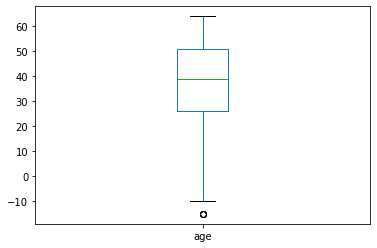

In [ ]:
df_insurance.age.plot.box()

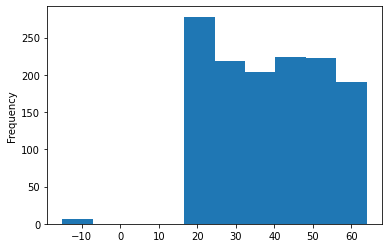

In [ ]:
df_insurance.age.plot.hist()

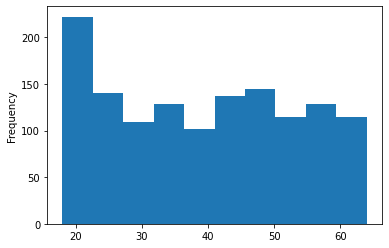

In [ ]:
df_insurance = df_insurance[df_insurance.age > 0]
df_insurance.age.plot.hist()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='quantile')
df_insurance = df_insurance.assign(age_discretized = discretizer.fit_transform(df_insurance.age.values.reshape(-1, 1)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized
0,19,female,27.900,0,yes,southwest,16884.92400,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,man,33.000,3,no,southeast,4449.46200,2.0
3,33,man,22.705,0,no,northwest,21984.47061,3.0
4,32,man,28.880,0,no,northwst,3866.85520,3.0


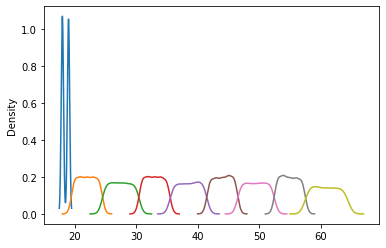

In [ ]:
[ df_insurance[df_insurance.age_discretized == i].age.plot.density() for i in range(9) ]

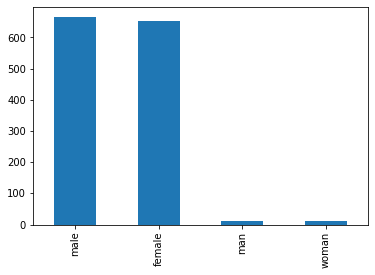

In [ ]:
df_insurance.sex.value_counts().plot.bar()

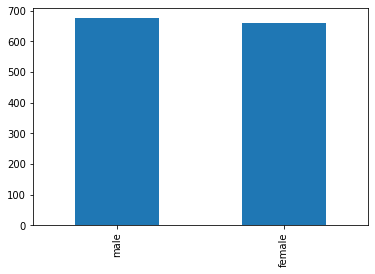

In [ ]:
def clean_variable_sex(x: str) -> str:
    if x == 'man':
        return 'male'
    elif x == 'woman':
        return 'female'
    else:
        return x

df_insurance.sex = df_insurance.sex.apply(clean_variable_sex)
df_insurance.sex.value_counts().plot.bar()

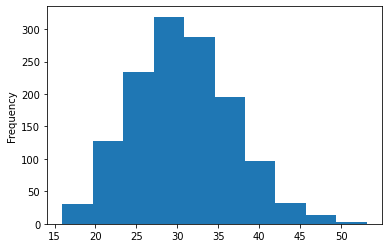

In [ ]:
df_insurance.bmi.plot.hist()

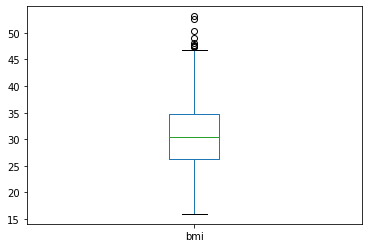

In [ ]:
df_insurance.bmi.plot.box()

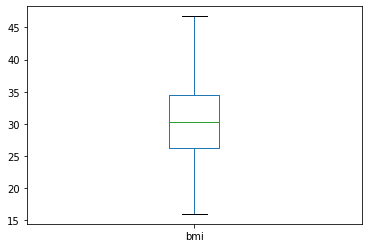

In [ ]:
from matplotlib.cbook import boxplot_stats

stats = boxplot_stats(df_insurance.bmi)[0]

df_insurance = df_insurance[df_insurance.bmi <= stats['whishi']]
df_insurance.bmi.plot.box()

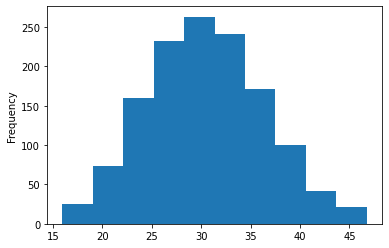

In [ ]:
df_insurance.bmi.plot.hist()

In [ ]:
def bmi_description(bmi: float) -> str:
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_insurance = df_insurance.assign(bmi_description = df_insurance.bmi.apply(bmi_description))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese
3,33,male,22.705,0,no,northwest,21984.47061,3.0,normal
4,32,male,28.880,0,no,northwst,3866.85520,3.0,overweight


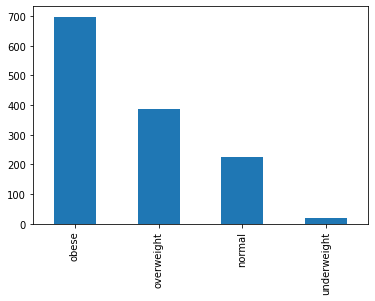

In [ ]:
df_insurance.bmi_description.value_counts().plot.bar()

In [ ]:
df_insurance.bmi_description.value_counts() / df_insurance.bmi_description.value_counts().sum()

obese          0.525207
overweight     0.290444
normal         0.169300
underweight    0.015049
Name: bmi_description, dtype: float64

In [ ]:
df_insurance.children.value_counts() / df_insurance.children.value_counts().sum()

0    0.429646
1    0.240783
2    0.179082
3    0.118134
4    0.018811
5    0.013544
Name: children, dtype: float64

In [ ]:
df_insurance.smoker.value_counts() / df_insurance.smoker.value_counts().sum()

no     0.796087
yes    0.203913
Name: smoker, dtype: float64

In [ ]:
df_insurance.region.value_counts()

southeast     357
southwest     315
northeast     310
northwest     309
northeastt     10
northwst        9
southwes        9
northwes        5
northeas        3
nortwest        2
Name: region, dtype: int64

In [ ]:
def clean_variable_region(x: str) -> str:
    if x in ['northeastt', 'northeas']:
        return 'northeast'
    elif x == 'southwes':
        return 'southwest'
    elif x in ['northwst', 'northwes', 'nortwest']:
        return 'northwest'
    else:
        return x

df_insurance.region = df_insurance.region.apply(clean_variable_region)
df_insurance.region.value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

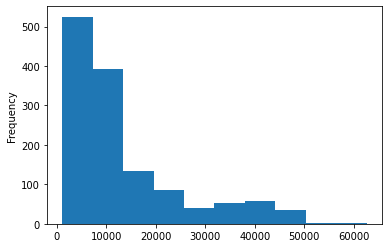

In [ ]:
df_insurance.charges.plot.hist()

In [ ]:
df_insurance = df_insurance.assign(charges_log = df_insurance.charges.apply(lambda x: np.log(x)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,3.0,normal,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,3.0,overweight,8.260197


In [ ]:
df_insurance = df_insurance.assign(charges_exp = df_insurance.charges_log.apply(lambda x: np.exp(x)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,charges_log,charges_exp
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,9.734176,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,7.453302,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,8.400538,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,3.0,normal,9.998092,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,3.0,overweight,8.260197,3866.85520


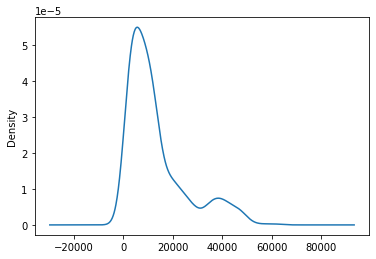

In [ ]:
df_insurance.charges.plot.density()

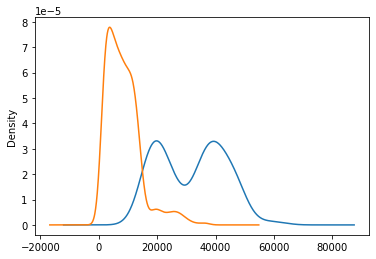

In [ ]:
df_insurance[df_insurance.smoker == 'yes'].charges.plot.density()
df_insurance[df_insurance.smoker == 'no'].charges.plot.density()

In [ ]:
df_subspace = df_insurance[df_insurance.smoker == 'yes']
df_insurance.shape, df_subspace.shape

((1329, 11), (271, 11))

In [ ]:
df_subspace.bmi_description.unique()

array(['overweight', 'obese', 'normal', 'underweight'], dtype=object)

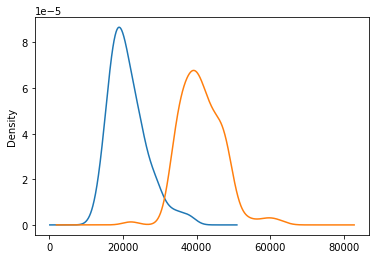

In [ ]:
df_subspace[df_subspace.bmi_description != 'obese'].charges.plot.density()
df_subspace[df_subspace.bmi_description == 'obese'].charges.plot.density()

In [ ]:
df_insurance = df_insurance.assign(smoker_bmi = df_insurance.apply(lambda x: '{}_{}'.format(x.smoker, x.bmi_description), axis=1))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,charges_log,charges_exp,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,9.734176,16884.92400,yes_overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,7.453302,1725.55230,no_obese
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,8.400538,4449.46200,no_obese
3,33,male,22.705,0,no,northwest,21984.47061,3.0,normal,9.998092,21984.47061,no_normal
4,32,male,28.880,0,no,northwest,3866.85520,3.0,overweight,8.260197,3866.85520,no_overweight


In [ ]:
df_insurance.smoker_bmi = df_insurance.smoker_bmi.apply(lambda x: 'no' if x.startswith('no') else x)
df_insurance.smoker_bmi = df_insurance.smoker_bmi.apply(lambda x: 'yes_not_obese' if x.startswith('yes') and 'obese' not in x else x)
df_insurance.smoker_bmi.unique()

array(['yes_not_obese', 'no', 'yes_obese'], dtype=object)

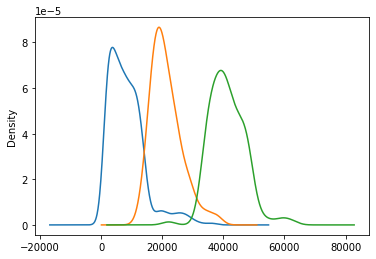

In [ ]:
df_insurance[df_insurance.smoker_bmi == 'no'].charges.plot.density()
df_insurance[df_insurance.smoker_bmi == 'yes_not_obese'].charges.plot.density()
df_insurance[df_insurance.smoker_bmi == 'yes_obese'].charges.plot.density()

In [ ]:
df_insurance.corr()

,age,bmi,children,charges,age_discretized,charges_log,charges_exp
age,1.000000,0.114686,0.043041,0.302022,0.993082,0.529323,0.302022
bmi,0.114686,1.000000,0.017355,0.193196,0.109636,0.133912,0.193196
children,0.043041,0.017355,1.000000,0.069739,0.050404,0.161744,0.069739
charges,0.302022,0.193196,0.069739,1.000000,0.297417,0.893941,1.000000
age_discretized,0.993082,0.109636,0.050404,0.297417,1.000000,0.527037,0.297417
charges_log,0.529323,0.133912,0.161744,0.893941,0.527037,1.000000,0.893941
charges_exp,0.302022,0.193196,0.069739,1.000000,0.297417,0.893941,1.000000


In [ ]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,charges_log,charges_exp,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,9.734176,16884.92400,yes_not_obese
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,7.453302,1725.55230,no
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,8.400538,4449.46200,no
3,33,male,22.705,0,no,northwest,21984.47061,3.0,normal,9.998092,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,3.0,overweight,8.260197,3866.85520,no


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def build_models(alg):
    if alg == 'linear_regression':
        model = LinearRegression()
        return model
    elif alg == 'lasso_regression':
        model = GridSearchCV(
            Lasso(normalize=True),
            param_grid={
                'alpha': np.linspace(0, 5, num=50)
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
        return model
    elif alg == 'ridge_regression':
        model = GridSearchCV(
            Ridge(normalize=True),
            param_grid={
                'alpha': np.linspace(0, 5, num=50)
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
        return model
    else:
        raise Exception('Modelo não implementado.')
    
def build_features(df_train, df_test):
    ohe_smoker_bmi = OneHotEncoder(sparse=False)
    x_train_ohe = ohe_smoker_bmi.fit_transform(df_train[['smoker_bmi', 'sex']])
    x_test_ohe = ohe_smoker_bmi.transform(df_test[['smoker_bmi', 'sex']])

    mms = MinMaxScaler()
    x_train_quant = mms.fit_transform(df_train[['children', 'age']])
    x_test_quant = mms.transform(df_test[['children', 'age']])
   
    x_train = np.hstack([x_train_ohe, x_train_quant])
    x_test = np.hstack([x_test_ohe, x_test_quant])

    y_train = df_train.charges.values.reshape(-1, 1)
    y_test = df_test.charges.values.reshape(-1, 1)

    return x_train, y_train, x_test, y_test


algs = ['linear_regression', 'lasso_regression', 'ridge_regression']
mean_r2 = np.zeros(shape=(len(algs), k, 2))
mean_mae = np.zeros(shape=(len(algs), k, 2))
for alg_index, alg in enumerate(algs):
    k = 10
    cv = KFold(n_splits=k, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_insurance)):
        df_train = df_insurance.iloc[train]
        df_test = df_insurance.iloc[test]

        # computar as features
        x_train, y_train, x_test, y_test = build_features(df_train, df_test)
        
        # treinar o modelo
        model = build_models(alg)
        model.fit(x_train, y_train)
        
        # coletar os resultados
        y_pred_train = model.predict(x_train)
        mean_mae[alg_index, fold, 0] = mean_absolute_error(y_train, y_pred_train)
        mean_r2[alg_index, fold, 0] = r2_score(y_train, y_pred_train)

        y_pred_test = model.predict(x_test)
        mean_mae[alg_index, fold, 1] = mean_absolute_error(y_test, y_pred_test)
        mean_r2[alg_index, fold, 1] = r2_score(y_test, y_pred_test)

    # apresentar os resultados
    print('-' * 50)
    print('Algoritmo:', alg)
    print('-' * 50)
    print('Treino - Média MAE: ', mean_mae[alg_index, :,0].mean())
    print('Teste - Média MAE: ', mean_mae[alg_index, :,1].mean())
    print('-' * 50)
    print('Treino - Média R2: ', mean_r2[alg_index, :,0].mean())
    print('Teste - Média R2: ', mean_r2[alg_index, :,1].mean())

In [ ]:
from scipy.stats import ttest_ind

t_test = ttest_ind(mean_mae[0,:,1], mean_mae[2,:,1])
alpha = 0.05

if t_test.pvalue < alpha:
    print('Rejeita a hipótese nula. As duas médias são diferentes!')
else:
    print('Aceita a hipótese nula. As duas médias são iguais!')

Aceita a hipótese nula. As duas médias são iguais!


In [ ]:
# após encontrar o melhor algoritmo, vamos fazer a seleção de modelos para 
# encontrar os melhores parâmetros do modelo 
# para isso, vamos adotar uma estratégia de validação cruzada utilizando
# grid search
# estamos SUPONDO que o algoritmo 'ridge regression' apresentou o melhor resultado
# isso não é verdade, as médias foram iguais, mas é um cenário de exemplo para 
# ilustrar o que nós faríamos para levar um modelo para produção

# aqui, estamos estrapolando, porque a validação cruzada só será realizada
# na chamada do método 'build_models' pelo grid search
# o correto seria dentro do grid search fazer o fit do build features também
x_train, y_train, x_test, y_test = build_features(df_insurance, df_insurance)

# treinar o modelo
model = build_models('ridge_regression')
model.fit(x_train, y_train)

# executamos para obter a melhor parametrização para o modelo
model.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.33091e-17): result may not be accurate.
  overwrite_a=True).T


{'alpha': 0.0}

In [ ]:
# depois de obter os melhores parâmetros para o modelo
# treinamos um novo modelo com essa parametrização, com todos os dados disponíveis

# aqui sim, repetimos, porque o dataset será completo
x_complete, y_complete, _, _ = build_features(df_insurance, df_insurance)

# treinar o modelo com a melhor parametrização encontrada
model = Ridge(alpha=0.0)
model.fit(x_complete, y_complete)

# esse seria o modelo enviado para produção, junto com todos os encoders necessários
# para fazer as transformações nos dados 
model

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Como utilizar out-of-folds da validação cruzada, para obter resultados do modelo

In [ ]:
cv = KFold(n_splits=10, shuffle=True)

predicted = list()
ground_truth = list()
# na estratégia do out-of-folds, nós não calculamos as métricas para cada um dos folds
# apenas armazenamos os resultados e dessa forma conseguimos fazer uma avaliação 
# de todo o nosso conjunto de dados
for fold, (train, test) in enumerate(cv.split(df_insurance)):
    df_train = df_insurance.iloc[train]
    df_test = df_insurance.iloc[test]

    x_train, y_train, x_test, y_test = build_features(df_train, df_test)

    model = build_models('ridge_regression')
    model.fit(x_train, y_train)

    predicted.extend(model.predict(x_test))
    ground_truth.extend(y_test)

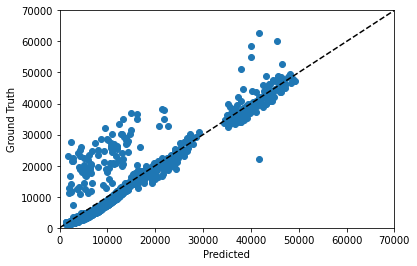

In [ ]:
fig, ax = plt.subplots()
ax.plot([0, 70000], [0,70000], 'k--')
ax.scatter(x=predicted, y=ground_truth)
ax.set_xlim([0, 70000])
ax.set_ylim([0, 70000])
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground Truth')
plt.show()

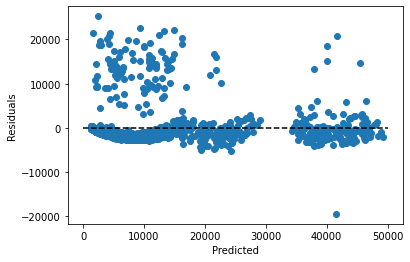

In [ ]:
fig, ax = plt.subplots()

residuals = [ ground_truth[i] - predicted[i] for i in range(len(predicted)) ]
ax.scatter(x=predicted, y=residuals)
ax.plot([0, 50000], [0,0], 'k--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()